# Vilnius Appartments
## By Svajune Klimasauskaite

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt
from pandas import DataFrame as df

%matplotlib inline

## Load Data



In [2]:
#Load flats
flat=pd.read_csv("https://raw.githubusercontent.com/vilnius/apartment-buildings/master/apartment_buildings_2019.csv", sep=';')
flat.head(2)

,id,adresas,namo_valdytojas,valdymo_forma,paskyrimo_pagrindas,administratoriaus_pabaigos_Data,paskirtis,uni_nr,bendr_plotas,naud_plotas,build_year,renov_metai,renovacijos_statusas,energ_naudingumo_klase,butu_skaicius,negyvenamuju_palapu_skaicius,korpusas,sklypo_plotas
0,1,A. Goštauto g. 2,286-oji gyvenamojo namo A.Goštauto g. 2/15 sav...,Bendrija,1995.02.02,NaN,Gyvenamoji (trys ir daugiau butų),1096-0010-4010,6607.43,4360.68,1960.0,NaN,Nerenovuotas,NaN,53.0,4.0,1A7p,0.00
1,2,A. Goštauto g. 3,DNSB NERIES VINGIS,Bendrija,2009.04.10,NaN,Gyvenamoji (trys ir daugiau butų),1095-7003-6016,4304.17,2771.57,1957.0,NaN,Nerenovuotas,NaN,38.0,14.0,1A5p,0.15


In [3]:
# Get rid of unnecessary columns
flat.drop(columns = ['namo_valdytojas', 'valdymo_forma', 'paskyrimo_pagrindas',
                    'administratoriaus_pabaigos_Data', 'uni_nr', 'korpusas'], inplace = True)

# Translate column names to english  
flat.rename(columns={'adresas':'street', 'paskirtis':'purpose',
                        'bendr_plotas':'area', 'naud_plotas':'area_useful',
                       'build_year':'year', 'renov_metai':'year_renov', 'renovacijos_statusas':'renov_status',
                       'energ_naudingumo_klase':'efficiency', 'butu_skaicius':'no_flats',
                       'negyvenamuju_palapu_skaicius':'not_living_flats','sklypo_plotas':'land',
                       }, inplace=True)
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
1647,1648,Ribiškių Didžioji g. 7,Gyvenamoji (trys ir daugiau butų),162.38,162.38,1936.0,NaN,Nerenovuotas,NaN,4.0,0.0,0.0
129,130,Gelvonų g. 11,Gyvenamoji (trys ir daugiau butų),5493.08,4583.03,1982.0,NaN,Nerenovuotas,NaN,80.0,0.0,0.0
5238,5240,V. Pietario g. 2,Gyvenamoji (trys ir daugiau butų),4358.48,3617.45,1963.0,NaN,Nerenovuotas,NaN,75.0,0.0,0.0
5436,5438,Dzūkų g. 17,Gyvenamoji (trys ir daugiau butų),2877.97,2618.54,1968.0,NaN,Nerenovuotas,NaN,50.0,0.0,0.0
5074,5076,Baltupio g. 45,Gyvenamoji (trys ir daugiau butų),2076.06,1727.70,1978.0,NaN,Galimai renovuotųsi,NaN,30.0,0.0,0.0


### Load Hierarchy

In [4]:
#Load flats
hier=pd.read_csv("⁨neight.csv", sep=';',encoding='utf-8')
hier.head(2)

,neighbourhood,street,municipality,houses,overlap,str_type
0,Antakalnis,Ajerų g.,Vilnius,28.0,No,Kitas
1,Antakalnis,Algirdo Juliaus Greimo g.,Vilnius,17.0,No,Kitas


## Data Check

In [5]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6521 entries, 0 to 6520
Data columns (total 12 columns):
id                  6521 non-null int64
street              6521 non-null object
purpose             6518 non-null object
area                6519 non-null float64
area_useful         6519 non-null float64
year                6510 non-null float64
year_renov          289 non-null float64
renov_status        6466 non-null object
efficiency          1291 non-null object
no_flats            6519 non-null float64
not_living_flats    6510 non-null float64
land                6513 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 611.4+ KB


In [6]:
flat.shape

(6521, 12)

In [7]:
# Count null records
flat.isnull().sum()

id                     0
street                 0
purpose                3
area                   2
area_useful            2
year                  11
year_renov          6232
renov_status          55
efficiency          5230
no_flats               2
not_living_flats      11
land                   8
dtype: int64

In [8]:
# Count unique records
flat.nunique()

id                  6521
street              5993
purpose               15
area                6094
area_useful         5840
year                 106
year_renov            13
renov_status           6
efficiency             8
no_flats             170
not_living_flats      98
land                 132
dtype: int64

In [9]:
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
1474,1475,P. Vileišio g. 14,Gyvenamoji (trys ir daugiau butų),3450.17,2993.87,1969.0,NaN,Nerenovuotas,NaN,51.0,0.0,0.0
1751,1752,Sakalų g. 23,Gyvenamoji (trys ir daugiau butų),1512.03,1492.17,1993.0,NaN,Nerenovuotas,NaN,28.0,0.0,0.4
6174,6178,Naugarduko g. 37,Gyvenamoji (trys ir daugiau butų),264.31,225.77,1940.0,NaN,Nerenovuotas,D,4.0,0.0,0.0
5352,5354,A. Jaroševičiaus g. 10,Gyvenamoji (trys ir daugiau butų),161.03,161.03,1940.0,NaN,Nerenovuotas,NaN,4.0,0.0,0.0
4531,4533,Gelvonų g. 28,Gyvenamoji (trys ir daugiau butų),1371.94,1089.00,1982.0,NaN,Nerenovuotas,D,20.0,0.0,0.0


## Data Cleaning and Augmentation

### Droping Empty Rows

In [10]:
flat[flat['year'].isnull() == True]

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
6490,6497,Santariškių g. 117,Gyvenamoji (trys ir daugiau butų),1833.48,1680.46,NaN,NaN,NaN,NaN,30.0,15.0,0.62
6491,6498,Santariškių g. 115,Gyvenamoji (trys ir daugiau butų),2340.29,2073.73,NaN,NaN,NaN,NaN,35.0,29.0,0.62
6496,6505,Sparno g. 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,6506,Naujininkų g. 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6514,6523,Stirnų g. 23,Gyvenamoji (trys ir daugiau butų),3479.44,2984.87,NaN,NaN,NaN,NaN,54.0,34.0,3479.44
6515,6524,Stumbrų g. 26B,Gyvenamoji (trys ir daugiau butų),3229.87,2852.10,NaN,NaN,NaN,NaN,54.0,13.0,0.68
6516,6525,Stumbrų g. 26,Gyvenamoji (trys ir daugiau butų),3991.43,3310.39,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6517,6526,Stirnų g. 21,Gyvenamoji (trys ir daugiau butų),3964.63,3327.61,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6518,6527,Stumbrų g. 26A,Gyvenamoji (trys ir daugiau butų),2855.18,2451.69,NaN,NaN,NaN,NaN,42.0,23.0,0.68
6519,6528,Linksmoji g. 139,NaN,5100.30,4422.15,NaN,NaN,NaN,NaN,79.0,67.0,0.31


In [11]:
flat.drop(index = [6496, 6497], inplace=True)
flat[flat['year'].isnull() == True]

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
6490,6497,Santariškių g. 117,Gyvenamoji (trys ir daugiau butų),1833.48,1680.46,NaN,NaN,NaN,NaN,30.0,15.0,0.62
6491,6498,Santariškių g. 115,Gyvenamoji (trys ir daugiau butų),2340.29,2073.73,NaN,NaN,NaN,NaN,35.0,29.0,0.62
6514,6523,Stirnų g. 23,Gyvenamoji (trys ir daugiau butų),3479.44,2984.87,NaN,NaN,NaN,NaN,54.0,34.0,3479.44
6515,6524,Stumbrų g. 26B,Gyvenamoji (trys ir daugiau butų),3229.87,2852.10,NaN,NaN,NaN,NaN,54.0,13.0,0.68
6516,6525,Stumbrų g. 26,Gyvenamoji (trys ir daugiau butų),3991.43,3310.39,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6517,6526,Stirnų g. 21,Gyvenamoji (trys ir daugiau butų),3964.63,3327.61,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6518,6527,Stumbrų g. 26A,Gyvenamoji (trys ir daugiau butų),2855.18,2451.69,NaN,NaN,NaN,NaN,42.0,23.0,0.68
6519,6528,Linksmoji g. 139,NaN,5100.30,4422.15,NaN,NaN,NaN,NaN,79.0,67.0,0.31
6520,6529,M. K. Paco g. 19,Gyvenamoji (trys ir daugiau butų),3645.90,2607.64,NaN,NaN,NaN,NaN,36.0,26.0,0.24


### Split Street and House info

In [12]:
flat['street'] = flat['street'].str.replace('Grigiškių', 'Grigiškės')
flat['street'] = flat['street'].str.replace('Pagiriai', 'Pagirio g.')
flat['street'] = flat['street'].str.replace('Rygos', 'Rygos g.')
flat['street'] = flat['street'].str.replace('Trinapolio', 'Trinapolio g.')
flat['street'] = flat['street'].str.replace('Medeinos', 'Medeinos g.')
flat['street'] = flat['street'].str.replace('Šopeno', 'V. Šopeno g.')
flat['street'] = flat['street'].str.replace('šešuol', 'Šešuolių g.')
flat['street'] = flat['street'].str.replace('Pavilnionių', 'Pavilnionių g.')
flat['street'] = flat['street'].str.replace('Žalioji aikštė', 'Žalioji a.')
flat['street'] = flat['street'].str.replace('Grigiškės', 'Afindevičių g.')
flat['street'] = flat['street'].str.replace('Žemynos .', 'Žemynos g.')
flat['street'] = flat['street'].str.replace('Gerovės g.', 'Gerosios Vilties g.')
flat['street'] = flat['street'].str.replace('Kubiliaus g.', 'J. Kubiliaus g.')
flat['street'] = flat['street'].str.replace('V. Šopenog . g.', 'V. Šopenog g.')
flat['street'] = flat['street'].str.replace('V. Druskio g.', 'Virginijaus Druskio g.')
flat['street'] = flat['street'].str.replace('A. J. Povilaičio g.', 'Apolinaro Juozo Povilaičio g.')
flat['street'] = flat['street'].str.replace('I. Šimulionio g.', 'Igno Šimulionio g.')
flat['street'] = flat['street'].str.replace('Rygos g. g.', 'Rygos g.')
flat['street'] = flat['street'].str.replace('V. V. Šopeno g. g.', 'V. Šopenog g.')
flat['street'] = flat['street'].str.replace('S. Nėries g.', 'Salomėjos Nėries g.')
flat['street'] = flat['street'].str.replace('V. Tverečiaus g.', 'Tverečiaus g.')
flat['street'] = flat['street'].str.replace('Ž. Liauksmino g.', 'Žygimanto Liauksmino g.')
flat['street'] = flat['street'].str.replace('M. Marcinkevičiaus g.', 'Mykolo Marcinkevičiaus g.')
flat['street'] = flat['street'].str.replace('Medeinos g. g.', 'Medeinos g.')
flat['street'] = flat['street'].str.replace('I.Šimulionio g.', 'Igno Šimulionio g.')
flat['street'] = flat['street'].str.replace('Smuglevičiaus g.', 'Pranciškaus Smuglevičiaus g.')
flat['street'] = flat['street'].str.replace('Miškinių g.', 'Miškinių Sodų g.')
flat['street'] = flat['street'].str.replace('Tiškevičiaus g.', 'J. Tiškevičiaus g.')
flat['street'] = flat['street'].str.replace('J. Tiškevičiaus', 'J. Tiškevičiaus g.')
flat['street'] = flat['street'].str.replace('Sausio 13osios g.', 'Sausio 13-osios g.')
flat['street'] = flat['street'].str.replace('Žemynos', 'Žemynos g.')
flat['street'] = flat['street'].str.replace('D. Gerbutavičiaus g. ', 'Dariaus Gerbutavičiaus g.')
flat['street'] = flat['street'].str.replace('Žirmūnų', 'Žirmūnų g.')
flat['street'] = flat['street'].str.replace('M.Marcinkevičiaus g.', 'Mykolo Marcinkevičiaus g.')
flat['street'] = flat['street'].str.replace('Žirmūnų g. g.', 'Žirmūnų g.')
flat['street'] = flat['street'].str.replace('Žemynos g. g. .', 'Žemynos g.')
flat['street'] = flat['street'].str.replace('Dariaus Gerbutavičiaus', 'Dariaus Gerbutavičiaus g.')
flat['street'] = flat['street'].str.replace('Krivių .g', 'Krivių g.')
flat['street'] = flat['street'].str.replace('Krivių.g', 'Krivių g.')
flat['street'] = flat['street'].str.replace('Bajorų kel.', 'Bajorų kelias')
flat['street'] = flat['street'].str.replace('Vydūno g. 14', 'Vydūno g.')
flat['street'] = flat['street'].str.replace('Ladygos g.', 'Kazimiero Ladygos g.')
flat['street'] = flat['street'].str.replace('Bukčių g.', 'M. Bukšos g.')
flat['street'] = flat['street'].str.replace('Musninkų', 'Musninkų g.')
flat['street'] = flat['street'].str.replace('Pušyno kel.', 'Pušyno kelias')
flat['street'] = flat['street'].str.replace('V.Šopeno gg.', 'V. Šopeno g.')
flat['street'] = flat['street'].str.replace('Donelaičio g.', 'K. Donelaičio g.')
flat['street'] = flat['street'].str.replace('Lazdynų g.', 'Lazdynų Pelėdos skv.')
flat['street'] = flat['street'].str.replace('J. J. Tiškevičiaus g.', 'J. Tiškevičiaus g.')
flat['street'] = flat['street'].str.replace('V. V. Šopeno g.', 'V. Šopeno g.')
flat['street'] = flat['street'].str.replace('Krivių g..', 'Krivių g.')


In [13]:
flat['house'] = flat['street'].str[::-1].str.split(' ').str[0].str[::-1]
flat.head(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land,house
0,1,A. Goštauto g. 2,Gyvenamoji (trys ir daugiau butų),6607.43,4360.68,1960.0,NaN,Nerenovuotas,NaN,53.0,4.0,0.00,2
1,2,A. Goštauto g. 3,Gyvenamoji (trys ir daugiau butų),4304.17,2771.57,1957.0,NaN,Nerenovuotas,NaN,38.0,14.0,0.15,3
2,3,A. Jakšto g. 11,Gyvenamoji (trys ir daugiau butų),182.92,123.47,1940.0,NaN,Nerenovuotas,NaN,2.0,2.0,0.00,11
3,4,A. Jakšto g. 2,Gyvenamoji (trys ir daugiau butų),600.71,0.00,1938.0,NaN,Nerenovuotas,NaN,4.0,3.0,0.00,2
4,5,A. Jakšto g. 6A,Gyvenamoji (trys ir daugiau butų),0.00,3531.56,2006.0,NaN,Nerenovuotas,NaN,40.0,8.0,0.15,6A


In [14]:
flat['street'] = flat['street'].str[::-1].str.split(' ').str[1:]
flat['street'] = flat['street'].str.join('')
flat['street'] = flat['street'].str[::-1]
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land,house
6510,6519,IgnoŠimulioniog.,Gyvenamoji (trys ir daugiau butų),1870.21,1570.41,1974.0,NaN,Nerenovuotas,F,30.0,0.0,0.00,10
1491,1492,Pajautosg.,Gyvenamoji (trys ir daugiau butų),1346.84,1067.20,1999.0,NaN,Nerenovuotas,NaN,20.0,0.0,0.00,9
3725,3727,Pergalėsg.,Gyvenamoji (trys ir daugiau butų),136.64,135.48,1940.0,NaN,Nerenovuotas,NaN,4.0,0.0,0.19,19
3585,3587,Džiaugsmog.,Gyvenamoji (trys ir daugiau butų),200.72,200.72,1940.0,NaN,Nerenovuotas,NaN,3.0,0.0,0.26,33
2234,2235,Viršuliškiųg.,Gyvenamoji (trys ir daugiau butų),3607.04,3329.07,1977.0,NaN,Nerenovuotas,NaN,60.0,4.0,0.00,55


In [15]:
flat['street'].nunique()

726

In [16]:
flat['house'].nunique()

526

### Flat Purpose

In [17]:
flat.purpose.unique()

array(['Gyvenamoji (trys ir daugiau butų)',
       'Gyvenamoji (įvairioms socialinėms grupėms)',
       'Gyvenamoji (vieno buto pastatai)', 'Prekybos\r\n',
       'Administracinė', 'Gyvenamoji (dviejų butų pastatas)',
       'Nenustatyta', 'Viešbučių', 'Sudegęs', 'Bendrabutis',
       'Gyvenamasis su visuomeninėmis patalpomis',
       'Prekybinis - administracinis pastatas su gyvenamomis patalpomis',
       'Daugiabutis gyvenamas namas/komercinė',
       'Gyvenamasis komercinis kompleksas', 'Dvibutis', nan], dtype=object)

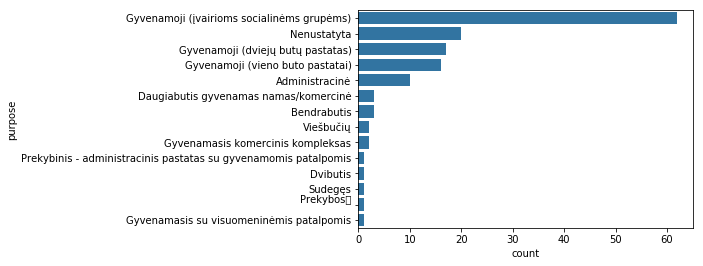

In [18]:
base_color=sb.color_palette()[0]
flat2 = flat[flat['purpose'] != 'Gyvenamoji (trys ir daugiau butų)']
order_rule=flat2['purpose'].value_counts().index
sb.countplot(data=flat2, y='purpose', color=base_color, order=order_rule);

In [19]:
flat[flat['purpose'] == 'Gyvenamoji (trys ir daugiau butų)']['id'].count()

6378

In [20]:
flat['purpose'].isnull().sum()

1

### Year

In [21]:
flat['year'].unique()

array([1960., 1957., 1940., 1938., 2006., 1955., 1959., 1953., 1972.,
       1996., 1995., 1994., 2008., 1901., 1961., 1958., 1974., 1968.,
       1975., 1963., 1964., 2001., 2002., 1967., 1966., 2007., 1970.,
       1971., 1969., 1980., 1984., 1986., 1985., 1981., 2013., 1997.,
       2009., 2000., 1993., 1989., 1982., 1977., 1983., 1965., 2004.,
       1973., 1979., 1952., 2012., 2015., 1987., 2003.,    0., 1962.,
       2005., 1976., 1978., 1998., 1923., 1999., 1944., 1950., 1990.,
       1988., 1991., 1954., 1903., 2014., 1951., 1992., 1956., 1912.,
       1934., 2010., 1935., 2016., 1937., 1911., 1933., 1930., 1928.,
       2011., 2017., 1931., 1932., 1916., 1947., 1939., 1936., 1913.,
       1948., 1922., 1910., 1946., 1929., 1914., 1941., 1905., 1942.,
       1920., 1949., 1924., 1927., 1915., 1908., 1926.,   nan])

In [22]:
flat['year'] = flat['year'].replace(0, np.nan)
flat['year'].unique()

array([1960., 1957., 1940., 1938., 2006., 1955., 1959., 1953., 1972.,
       1996., 1995., 1994., 2008., 1901., 1961., 1958., 1974., 1968.,
       1975., 1963., 1964., 2001., 2002., 1967., 1966., 2007., 1970.,
       1971., 1969., 1980., 1984., 1986., 1985., 1981., 2013., 1997.,
       2009., 2000., 1993., 1989., 1982., 1977., 1983., 1965., 2004.,
       1973., 1979., 1952., 2012., 2015., 1987., 2003.,   nan, 1962.,
       2005., 1976., 1978., 1998., 1923., 1999., 1944., 1950., 1990.,
       1988., 1991., 1954., 1903., 2014., 1951., 1992., 1956., 1912.,
       1934., 2010., 1935., 2016., 1937., 1911., 1933., 1930., 1928.,
       2011., 2017., 1931., 1932., 1916., 1947., 1939., 1936., 1913.,
       1948., 1922., 1910., 1946., 1929., 1914., 1941., 1905., 1942.,
       1920., 1949., 1924., 1927., 1915., 1908., 1926.])

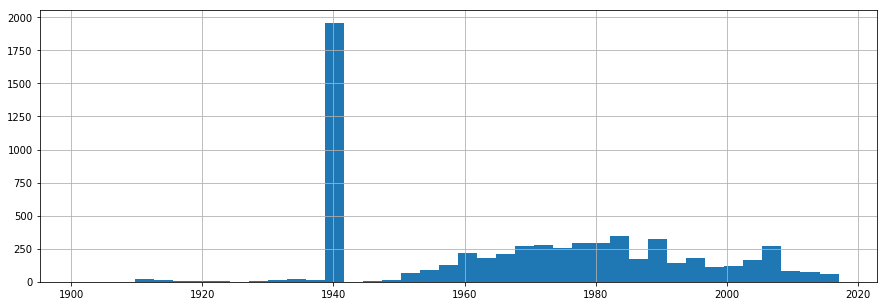

In [23]:
plt.figure(figsize = [15, 5]) 
flat['year'].hist(bins=40);

In [24]:
flat[flat['year'].isnull() == True].sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land,house
2218,2219,Vilniausg.,Gyvenamoji (trys ir daugiau butų),0.00,0.00,NaN,NaN,Nerenovuotas,NaN,0.0,0.0,0.00,6A
2212,2213,Vilniausg.,Gyvenamoji (įvairioms socialinėms grupėms),0.00,0.00,NaN,NaN,Nerenovuotas,NaN,0.0,0.0,0.00,2
2613,2615,Rūtųg.,Gyvenamoji (trys ir daugiau butų),122.36,90.37,NaN,NaN,Nerenovuotas,NaN,4.0,0.0,0.00,19
6518,6527,Stumbrųg.,Gyvenamoji (trys ir daugiau butų),2855.18,2451.69,NaN,NaN,NaN,NaN,42.0,23.0,0.68,26A
1945,1946,Šviesosg.,Gyvenamoji (trys ir daugiau butų),0.00,0.00,NaN,NaN,Nerenovuotas,NaN,0.0,0.0,0.00,3


### Renovation Year

In [25]:
flat['year_renov'].unique()

array([  nan, 2017., 2016., 2007., 2006., 2010., 2008., 2009., 2015.,
       2005., 2000., 2011., 2014., 2013.])

In [26]:
flat['year_renov'] = flat['year_renov'].replace(0, np.nan)
flat['year_renov'].unique()

array([  nan, 2017., 2016., 2007., 2006., 2010., 2008., 2009., 2015.,
       2005., 2000., 2011., 2014., 2013.])

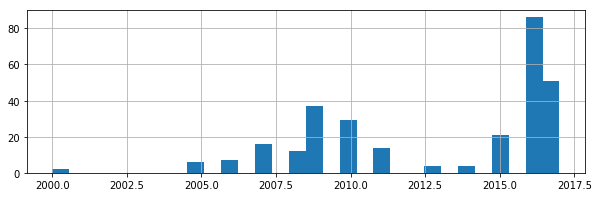

In [27]:
plt.figure(figsize = [10, 3]) 
flat['year_renov'].hist(bins = 30);

### Renovation Status

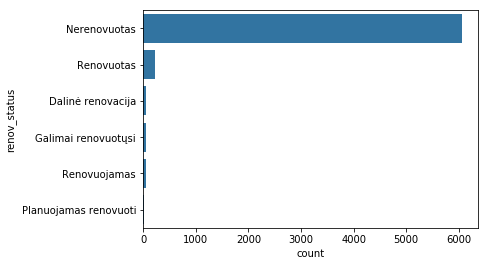

In [28]:
base_color=sb.color_palette()[0]
order_rule=flat['renov_status'].value_counts().index
sb.countplot(data=flat, y='renov_status', color=base_color, order=order_rule);

In [29]:
flat['renov_status'].isnull().sum()

53

In [30]:
flat['renov_status'].replace(np.nan, 'Nerenovuotas', inplace = True, regex = True)
flat['renov_status'].isnull().sum()

0

In [31]:
flat['renov_status'].unique()

array(['Nerenovuotas', 'Renovuotas', 'Renovuojamas', 'Dalinė renovacija',
       'Galimai renovuotųsi', 'Planuojamas renovuoti'], dtype=object)

### House Efficiency

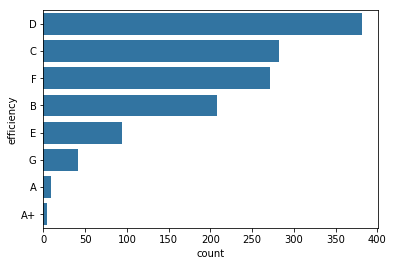

In [32]:
base_color=sb.color_palette()[0]
order_rule=flat['efficiency'].value_counts().index
sb.countplot(data=flat, y='efficiency', color=base_color, order=order_rule);

In [33]:
flat['efficiency'].isnull().mean()

0.8019634913330266

### Number of Flats in the Building

In [34]:
print('Number of records without information: {}'.format(flat['no_flats'].isnull().sum()))
print('Total number of appartments: {}'.format(flat['no_flats'].sum()))

Number of records without information: 0
Total number of appartments: 214450.0


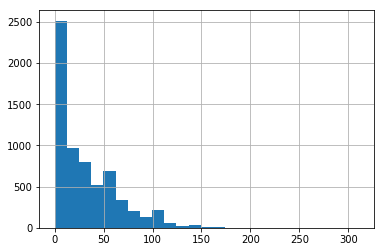

In [35]:
flat['no_flats'].hist(bins = 25);

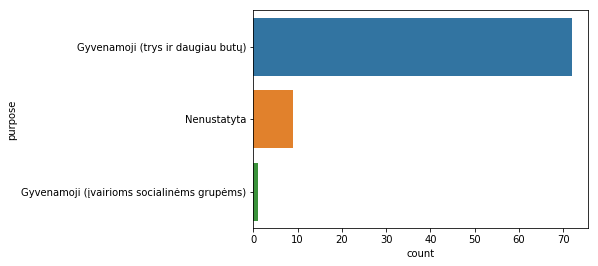

In [36]:
a = flat[flat['no_flats']==0]
sb.countplot(data = a, y ='purpose');

In [37]:
flat['no_flats'] = flat['no_flats'].replace(0, np.nan)

### Number of Not Occupied Flats

In [38]:
flat['not_living_flats'].isnull().sum()

9

In [39]:
flat['not_living_flats'].replace(np.nan, 0, inplace = True, regex = True)
flat['not_living_flats'].isnull().sum()

0

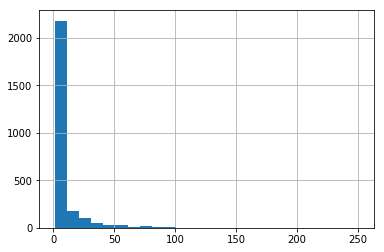

In [40]:
flat[flat['not_living_flats'] != 0]['not_living_flats'].hist(bins = 25);

### Land

In [41]:
flat['land'].isnull().sum()

6

In [42]:
flat['land'].replace(np.nan, 0, inplace = True)
flat['land'].isnull().sum()

0

In [43]:
flat['land'].describe()

count     6519.000000
mean        96.844699
std       1939.744334
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      39190.000000
Name: land, dtype: float64

## Merge with Hierarchy

In [54]:
hier['street'] = hier['street'].str.split(' ')
hier['street'] = hier['street'].str.join('')
hier.head()

,neighbourhood,street,municipality,houses,overlap,str_type
0,Antakalnis,Ajerųg.,Vilnius,28.0,No,Kitas
1,Antakalnis,AlgirdoJuliausGreimog.,Vilnius,17.0,No,Kitas
2,Antakalnis,Anapiliog.,Vilnius,48.0,No,Kitas
3,Antakalnis,Antakalniog.,Vilnius,147.0,No,Kitas
4,Antakalnis,AntanoŠkėmosg.,Vilnius,12.0,No,Kitas


In [56]:
merged = flat.merge(hier, how='outer', left_on = 'street', right_on = 'street', 
                    left_index=False, right_index = False)
merged.street.unique()

array(['A.Goštautog.', 'A.Jakštog.', 'A.Juozapavičiausg.', ...,
       'VokėsSodų8-ojig.', 'Zyliųg.', 'Žalvarniųg.'], dtype=object)

## Quality Check

In [57]:
merged.isnull().sum()

id                   1760
street                  0
purpose              1761
area                 1760
area_useful          1760
year                 1888
year_renov          10016
renov_status         1760
efficiency           8648
no_flats             1864
not_living_flats     1760
land                 1760
house                1760
neighbourhood         543
municipality          543
houses                698
overlap               543
str_type              543
dtype: int64

## Save the File

In [58]:
df.to_csv(flat, '⁨clean_vilnius_flats.csv', sep=';', encoding='utf-8', index=False)